<h1>Feature Selection Using Most Important Features</h1>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<h3>A - Import data</h3>

In [2]:
features_names = [
    'month-day',
    'month',
    'day_in_month',
    'adep', 
    'country_code_adep', 
    'ades', 
    'country_code_ades', 
    'aircraft_type', 
    'wtc', 
    'airline', 
    'flight_duration', 
    'taxiout_time', 
    'flown_distance', 
    'actual_offblock_time_hour', 
    'actual_offblock_time_minute', 
    'actual_offblock_time_hour_minute', 
    'arrival_time_hour', 
    'arrival_time_minute', 
    'arrival_time_hour_minute', 
    'latitude_median', 
    'longitude_median', 
    'altitude_mean', 
    'groundspeed_mean', 
    'track_mean', 
    'vertical_rate_mean', 
    'track_unwrapped_mean', 
    'u_component_of_wind_mean', 
    'v_component_of_wind_mean', 
    'temperature_mean', 
    'specific_humidity_mean'
]

<h3>B - Prepare training and test data</h3>

In [3]:
encoded_challenge_set = pd.read_csv('../../data/encoded_challenge_set.csv')

features = encoded_challenge_set[features_names]

target = encoded_challenge_set['tow']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123, shuffle=True)

<h3>C - Train the optimal model on all features based on tuned parameters from Grid Search</h3>

In [4]:
model = xgb.XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=10,
    n_estimators=91,
    subsample=1.0,
    tree_method='hist',      # Use hist or approx to support categorical data
    enable_categorical=True,  # Enable categorical handling if using version 1.5.0+
    objective='reg:squarederror', 
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=91, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

<h3>D - Evaluate the built model using RMSE</h3>

In [5]:
# Function to score model using Root Mean Square Error
def rmse(y_true: pd.Series, y_pred: pd.Series) -> int:
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [6]:
y_pred = model.predict(X_test)
test_rmse = rmse(y_test, y_pred)
print("Test RMSE: ", test_rmse)

Test RMSE:  3526.0372218236844


<h3>E - View feature importance</h3>

In [7]:
ft_imp = pd.Series(model.feature_importances_, index=features_names).sort_values(ascending=False)
display(ft_imp)

wtc                                 0.986394
aircraft_type                       0.006511
flown_distance                      0.003213
airline                             0.001248
ades                                0.000681
flight_duration                     0.000525
adep                                0.000445
country_code_adep                   0.000182
country_code_ades                   0.000169
longitude_median                    0.000108
groundspeed_mean                    0.000099
month                               0.000098
latitude_median                     0.000074
altitude_mean                       0.000032
month-day                           0.000023
arrival_time_hour_minute            0.000021
taxiout_time                        0.000021
actual_offblock_time_hour_minute    0.000017
actual_offblock_time_hour           0.000016
track_mean                          0.000015
arrival_time_hour                   0.000015
specific_humidity_mean              0.000015
vertical_r

<h3>F - Train several models top compare with by adding one important feature at a time</h3>

In [8]:
sorted_important_features = ft_imp.index.tolist()
number_of_top_features = []
rmse_scores = []

for n in range(1, len(sorted_important_features)+1):
    current_top_features = ft_imp.index[:n].tolist()

    features = encoded_challenge_set[current_top_features]
    
    target = encoded_challenge_set['tow']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123, shuffle=True)
    
    model = xgb.XGBRegressor(
        colsample_bytree=1.0,
        learning_rate=0.1,
        max_depth=10,
        n_estimators=91,
        subsample=1.0,
        tree_method='hist',      # Use hist or approx to support categorical data
        enable_categorical=True,  # Enable categorical handling if using version 1.5.0+
        objective='reg:squarederror', 
        random_state=42
    )
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    test_rmse = rmse(y_test, y_pred)

    number_of_top_features.append(n)
    rmse_scores.append(test_rmse)
    
    print(f"Number of top features: {n}, Test RMSE: {test_rmse}")

Number of top features: 1, Test RMSE: 20482.57830598627
Number of top features: 2, Test RMSE: 10925.186516173428
Number of top features: 3, Test RMSE: 6558.003764059231
Number of top features: 4, Test RMSE: 4697.03115560309
Number of top features: 5, Test RMSE: 4265.135819793406
Number of top features: 6, Test RMSE: 4251.916207689633
Number of top features: 7, Test RMSE: 4139.371331903971
Number of top features: 8, Test RMSE: 4138.4676658983535
Number of top features: 9, Test RMSE: 4138.929177303878
Number of top features: 10, Test RMSE: 4127.114689096828
Number of top features: 11, Test RMSE: 4137.775740337941
Number of top features: 12, Test RMSE: 3821.810044086228
Number of top features: 13, Test RMSE: 3826.9493325027147
Number of top features: 14, Test RMSE: 3675.9609741542913
Number of top features: 15, Test RMSE: 3583.2291773741463
Number of top features: 16, Test RMSE: 3506.5803156862153
Number of top features: 17, Test RMSE: 3503.3203103202013
Number of top features: 18, Test R

<h3>G - Plot the results</h3>

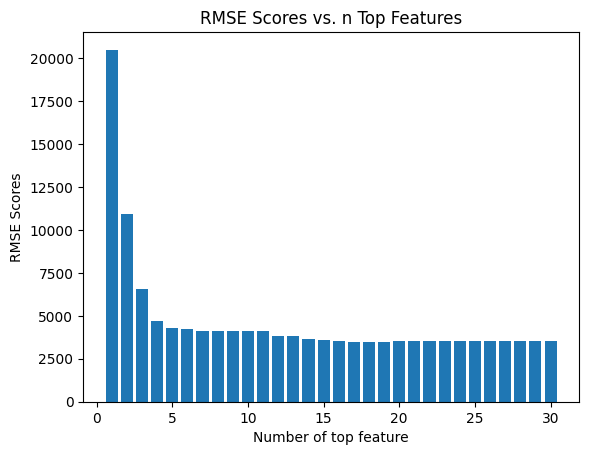

In [9]:
plt.bar(number_of_top_features, rmse_scores)
plt.xlabel('Number of top feature')
plt.ylabel('RMSE Scores')
plt.title('RMSE Scores vs. n Top Features')
plt.show()

<strong>We notice that the top 19 important features gives us the lowest RMSE score at 3502, so maybe it is a goode idea to train a model using the top 19 features to reduce dimentionality</strong>

In [10]:
top_important_features = [
    'wtc',
    'aircraft_type',
    'flown_distance',
    'airline',
    'ades',
    'flight_duration',
    'adep',
    'country_code_adep',
    'country_code_ades',
    'longitude_median',
    'groundspeed_mean',
    'month',
    'latitude_median', 
    'altitude_mean', 
    'month-day',
    'taxiout_time',
    'actual_offblock_time_hour_minute',
    'actual_offblock_time_hour', 
    'arrival_time_hour_minute'
]

features = encoded_challenge_set[top_important_features]

target = encoded_challenge_set['tow']

X_train_top_imp, X_test_top_imp, y_train_top_imp, y_test_top_imp = train_test_split(features, target, test_size=0.3, random_state=123, shuffle=True)

In [11]:
model = xgb.XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=10,
    n_estimators=91,
    subsample=1.0,
    tree_method='hist',      # Use hist or approx to support categorical data
    enable_categorical=True,  # Enable categorical handling if using version 1.5.0+
    objective='reg:squarederror', 
    random_state=42
)

model.fit(X_train_top_imp, y_train_top_imp)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=91, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
y_pred_top_imp = model.predict(X_test_top_imp)
test_rmse_top_imp = rmse(y_test_top_imp, y_pred_top_imp)
print("Test RMSE with top important features: ", test_rmse_top_imp)

Test RMSE with top important features:  3502.6117970400114
